# Статистика, DS-поток
## Задание SP.10

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание.**

Практика:
* Задача P1 &mdash; 20 баллов;
* Задача P2 &mdash; 30 баллов;
* Задача P3 &mdash; 90 баллов;
* Задача P4 &mdash; 100 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи P1-P3;
* *средняя:* задача P4.

Задачи расставлены в том порядке, в котором их наиболее логично выполнять.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Исправил рассчет ошибки первого рода</font></b>
  * <b><font color="#00b565" size="3">Выписал формулы</font></b>

* <b><font size="4">Задача 3</font></b>
  * <b><font color="#00b565" size="3">Обосновал выбор критериев</font></b>
  * <b><font color="#00b565" size="3">Проверил все признаки</font></b>
  * <b><font color="#00b565" size="3">Добавил ответ на вопрос</font></b>
  * <b><font color="#00b565" size="3">Дополнил вывод</font></b>

* <b><font size="4">Задача 4</font></b>
  * <b><font color="#00b565" size="3">Добавил выводы про разные типы матриц</font></b>

In [1]:
# Bot check

# HW_ID: ds_sp10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sps
from statsmodels.stats.multitest import multipletests

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

_____
### Задача P1. 20 баллов
Были проведены эксперименты для оценки эффективности нескольких препаратов для снижения послеоперационной тошноты. Результаты экспериментов приведены в таблице ниже. При проведении эксперимента пациенты делились на группы случайным образом.




|| Количество пациентов   | Количество случаев возникновения тошноты |
|-----------| ----------- | -------|
|1. Плацебо|80|45|
|2. Хлорпромазин|75|26|
|3. Дименгидринат|85|52|
|4. Пентобарбитал (100 мг)|67|35|
|5. Пентобарбитал (150 мг)|85|37|




Проведите сравнение каждого препарата по эффективности по отношению к плацебо. Какие ответы можно получить для методов, контролирующих FWER и FDR? В каждом случае приведите скорректированные p-value.

*Замечание.* Используйте [`multipletests`](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html) из библиотеки `statsmodels`.

**Решение:**

Будем считать, что $X_j = (X_j1,..., X_jn), \text{где} \ X_{nm} \sim$ Bern(p)

В качесте гипотез будем брать $H_i: p = \frac{45}{80}$ vs $\widehat{H_i}: p < \frac{45}{80}$

В качестве критерия возьмем РНМК: $S_n = \{\sum\limits^n_{i=1}X_i < c_{n, \alpha}\}$

Для начала найдем pvalue

In [3]:
n_values = [80, 75, 85, 67, 85]
m_values = [45, 26, 52, 35, 37]
p = 45 / 80

binom_p_values = []
for n, m in zip(n_values, m_values):
    binom = sps.binom(n, p)
    binom_p_values.append(binom.cdf(m))

print("Полученные p-values", [round(p, 4) for p in binom_p_values])

Полученные p-values [0.543, 0.0001, 0.8474, 0.2939, 0.0124]


Посчитаем результаты для разных методов, контролирующих FWER и FDR.

Для начала посмотрим на метод Бонферрони -- он котролирует FWER.

In [4]:
def apply_multiple_testing_correction(pvals, names, method, alpha=0.05):
    correction_results = multipletests(
        pvals,
        method=method,
        alpha=alpha,
    )

    results_df = pd.DataFrame(
        {
            "Название": names,
            "p-value ": np.round(pvals, 4),
            f"p-value (скорр.): {method}": np.round(correction_results[1], 4),
            f"Отвергаем H0: {method}": correction_results[0],
        }
    )

    return results_df


names = [
    "Плацебо",
    "Хлорпромазин",
    "Дименгидринат",
    "Пентобарбитал (100 мг)",
    "Пентобарбитал (150 мг)",
]
bonferroni_results = apply_multiple_testing_correction(
    binom_p_values, names, "bonferroni"
)
bonferroni_results

,Название,p-value,p-value (скорр.): bonferroni,Отвергаем H0: bonferroni
0,Плацебо,0.5430,1.0000,False
1,Хлорпромазин,0.0001,0.0007,True
2,Дименгидринат,0.8474,1.0000,False
3,Пентобарбитал (100 мг),0.2939,1.0000,False
4,Пентобарбитал (150 мг),0.0124,0.0619,False


Теперь посмотрим на метод Холма. Он также контролирует FWER.

In [5]:
holm_results = apply_multiple_testing_correction(binom_p_values, names, "holm")
holm_results

,Название,p-value,p-value (скорр.): holm,Отвергаем H0: holm
0,Плацебо,0.5430,1.0000,False
1,Хлорпромазин,0.0001,0.0007,True
2,Дименгидринат,0.8474,1.0000,False
3,Пентобарбитал (100 мг),0.2939,0.8818,False
4,Пентобарбитал (150 мг),0.0124,0.0495,True


Метод Шидака. Он контроллирует FWER.

In [6]:
sidak_results = apply_multiple_testing_correction(binom_p_values, names, "sidak")
sidak_results

,Название,p-value,p-value (скорр.): sidak,Отвергаем H0: sidak
0,Плацебо,0.5430,0.9801,False
1,Хлорпромазин,0.0001,0.0007,True
2,Дименгидринат,0.8474,0.9999,False
3,Пентобарбитал (100 мг),0.2939,0.8245,False
4,Пентобарбитал (150 мг),0.0124,0.0604,False


Так между проведенными тестами могут быть корреляции, то будем использовать метод Бенджамини-Иекутелли. Он контроллирует FDR.

In [7]:
benjamini_yekutelli_results = apply_multiple_testing_correction(
    binom_p_values, names, "fdr_by"
)
benjamini_yekutelli_results

,Название,p-value,p-value (скорр.): fdr_by,Отвергаем H0: fdr_by
0,Плацебо,0.5430,1.0000,False
1,Хлорпромазин,0.0001,0.0015,True
2,Дименгидринат,0.8474,1.0000,False
3,Пентобарбитал (100 мг),0.2939,1.0000,False
4,Пентобарбитал (150 мг),0.0124,0.0706,False


**Вывод:** Из тестов, можно сделать вывод, что только хлопромазин действительно помогает от тошноты. Все остальные препраты (за ислючением может быть 150мг пентобарбитала) не имеют никакого влияния на тошноту.

В номере, были применены различные методы контроля FWER и FDR. А также были получены скорректированные значения p-value.

_____
### Задача P2. 20 баллов

Пусть $X_1, ..., X_n \sim Bern(p)$.
Известно, что $S_n = \left\{\sum_{i=1}^n x_i > c_{n,\alpha}\right\}$ является равномерно наиболее мощным критерием для проверки $\mathsf{H}_0\colon p=1/2\ vs.\ \mathsf{H}_1\colon p>1/2$, где $\alpha$ &mdash; уровень значимости.

Некоторая компания решила воспользоваться этим критерием для решения одной своей задачи. Например, это может быть исследование конверсии в клик, заполнении формы, указания номера телефона, и тд. Конверсия &mdash; доля пользователей, которая совершит определенное целевое действие.

Данные приходят онлайн, но не так часто. Для простоты задачи будем считать, что данные приходят по одному наблюдению в сутки. Однако, маркетологи не хотят долго ждать, и решают проверять гипотезу каждый день с помощью имеющихся на текущий момент данных.
То есть в $k$-й день они пользуются критерием $S_k$, имея выборку $X_1, ..., X_k$.
Если же в один из дней соответствующий критерий дает положительный результат (т.е. отклоняет $\mathsf{H}_0$), то маркетологи завершают наблюдения, иначе &mdash; продолжают тестирование.

<b><font color="#00b565" size="5">Выписал формулы</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b>
Не выписаны формулы. 


Выпишем критерий:

$X_1, \dots, X_n \sim Bern(p)$, гипотеза $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Тогда РНМК критерий имеет вид $S = \left\{\sum_{i=1}^n x_i > c_\alpha\right\}$. $c_\alpha = u_{1-\alpha} + 1$, где $u_p$ &mdash; $p$-квантиль $Bin(n, 0.5)$

Чуть более формально можно записать так:
$$
c_\alpha =  \begin{cases}
    u_{1-\alpha}\: + 1, & \text{если } \mathsf{P}_{0.5}\:(T(X) = u_{1-\alpha}\:) > 0\\
    u_{1-\alpha}, & \text{иначе}
  \end{cases}
$$

Промоделируйте подобную процедуру в течение 100 дней в предположении справедливости $\mathsf{H}_0$.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


In [8]:
p = np.random.uniform(0.4, 0.6)
alpha = 0.05

p0 = 0.5
X = sps.binom(1, p0).rvs(100)
S_critereas = []

number_of_days = -1
for n in range(len(X)):
    binom = sps.binom(n + 1, 1/2)
    criterea = np.sum(X[: n + 1]) > binom.ppf(1 - alpha)
    S_critereas.append(criterea)

    if criterea:
        number_of_days = n + 1
        break

if number_of_days == -1:
    print("Гипотеза не была отвергнута")
else:
    print(f"Гипотеза была отвергнута на {number_of_days}-м дне")

Гипотеза не была отвергнута


Повторите данный эксперимент достаточное количество раз и по результатам оцените вероятность ошибки I рода в случае если компания проводит эксперимент не более $n$ дней. Постройте ее график в зависимости от $n$.

<b><font color="#00b565" size="5">Исправил рассчет ошибки первого рода</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b>

Неверно считается вероятность ошибки 1 рода. 

In [9]:
def calculate_type_I_error(number_of_experiments, sample_size, alpha=0.05, theta_0=0.5):
    mean_criterion_values = np.zeros(sample_size)

    for _ in tqdm(range(number_of_experiments)):
        sample = sps.bernoulli(theta_0).rvs(size=sample_size)
        
        current_T = 0
        criterion_values = []
        
        for k in range(sample_size):
            current_T += sample[k]
            c_alpha = sps.binom(n=k+1, p=theta_0).ppf(1 - alpha)
            
            if sps.binom(n=k+1, p=theta_0).cdf(c_alpha) > alpha:
                c_alpha -= 1
            
            criterion_values.append(int(current_T > c_alpha))
        
        mean_criterion_values += np.array(criterion_values)

    mean_criterion_values /= number_of_experiments
    return mean_criterion_values

number_of_experiments = 100
sample_size = 100
alpha = 0.05
theta_0 = 0.5

mean_criterion_values = calculate_type_I_error(number_of_experiments, sample_size, alpha, theta_0)


  0%|          | 0/100 [00:00<?, ?it/s]

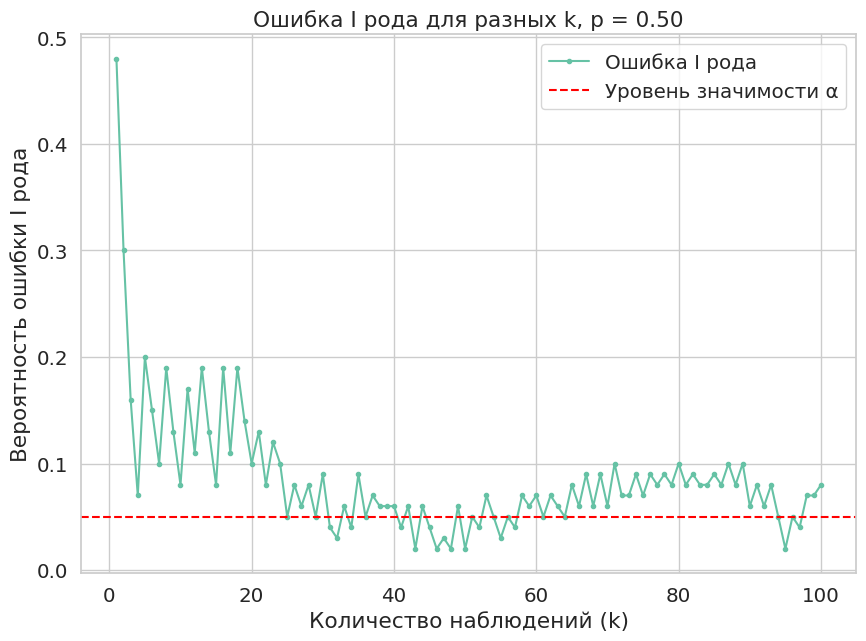

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, sample_size + 1), mean_criterion_values, marker=".", label="Ошибка I рода")
plt.axhline(y=alpha, color="r", linestyle="--", label="Уровень значимости α")
plt.xlabel("Количество наблюдений (k)")
plt.ylabel("Вероятность ошибки I рода")
plt.title(f"Ошибка I рода для разных k, p = {theta_0:.2f}")
plt.legend()
plt.show()

<b><font color="#00b565" size="5">Конец исправлений</font></b>

Сделайте выводы

Как видим, подглядывание дает нам ложный вывод о том, что мы не поддерживаем уровень значимости alpha, что не верно, если подсчитать его в конце. Таким образом, подглядывая, мы можем получить неверное представление о мощности нашего критерия 

*Замечание.* В статистике (в т.ч. в АБ-тестировании) подобный эффект называется *проблемой подглядывания* (peeking problem). Размер выборки для применения критерия должен быть определен заранее, его нельзя как-то сокращать на основе полученных данных, даже если бизнесу очень хочется.

___________
### Задача P3.

*Примечание.* Задача достаточно простая, кода здесь мало. Основное количество баллов дается за ответы на вопросы. Не забывайте также смотреть в ноутбуки с семинаров.

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>, взяв все признаки, кроме `Class`.

Признак Class содержится в y.

In [11]:
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=109)

X = wine.data.features
y = wine.data.targets

In [12]:
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько столбцов, используя `plt.subplot`.

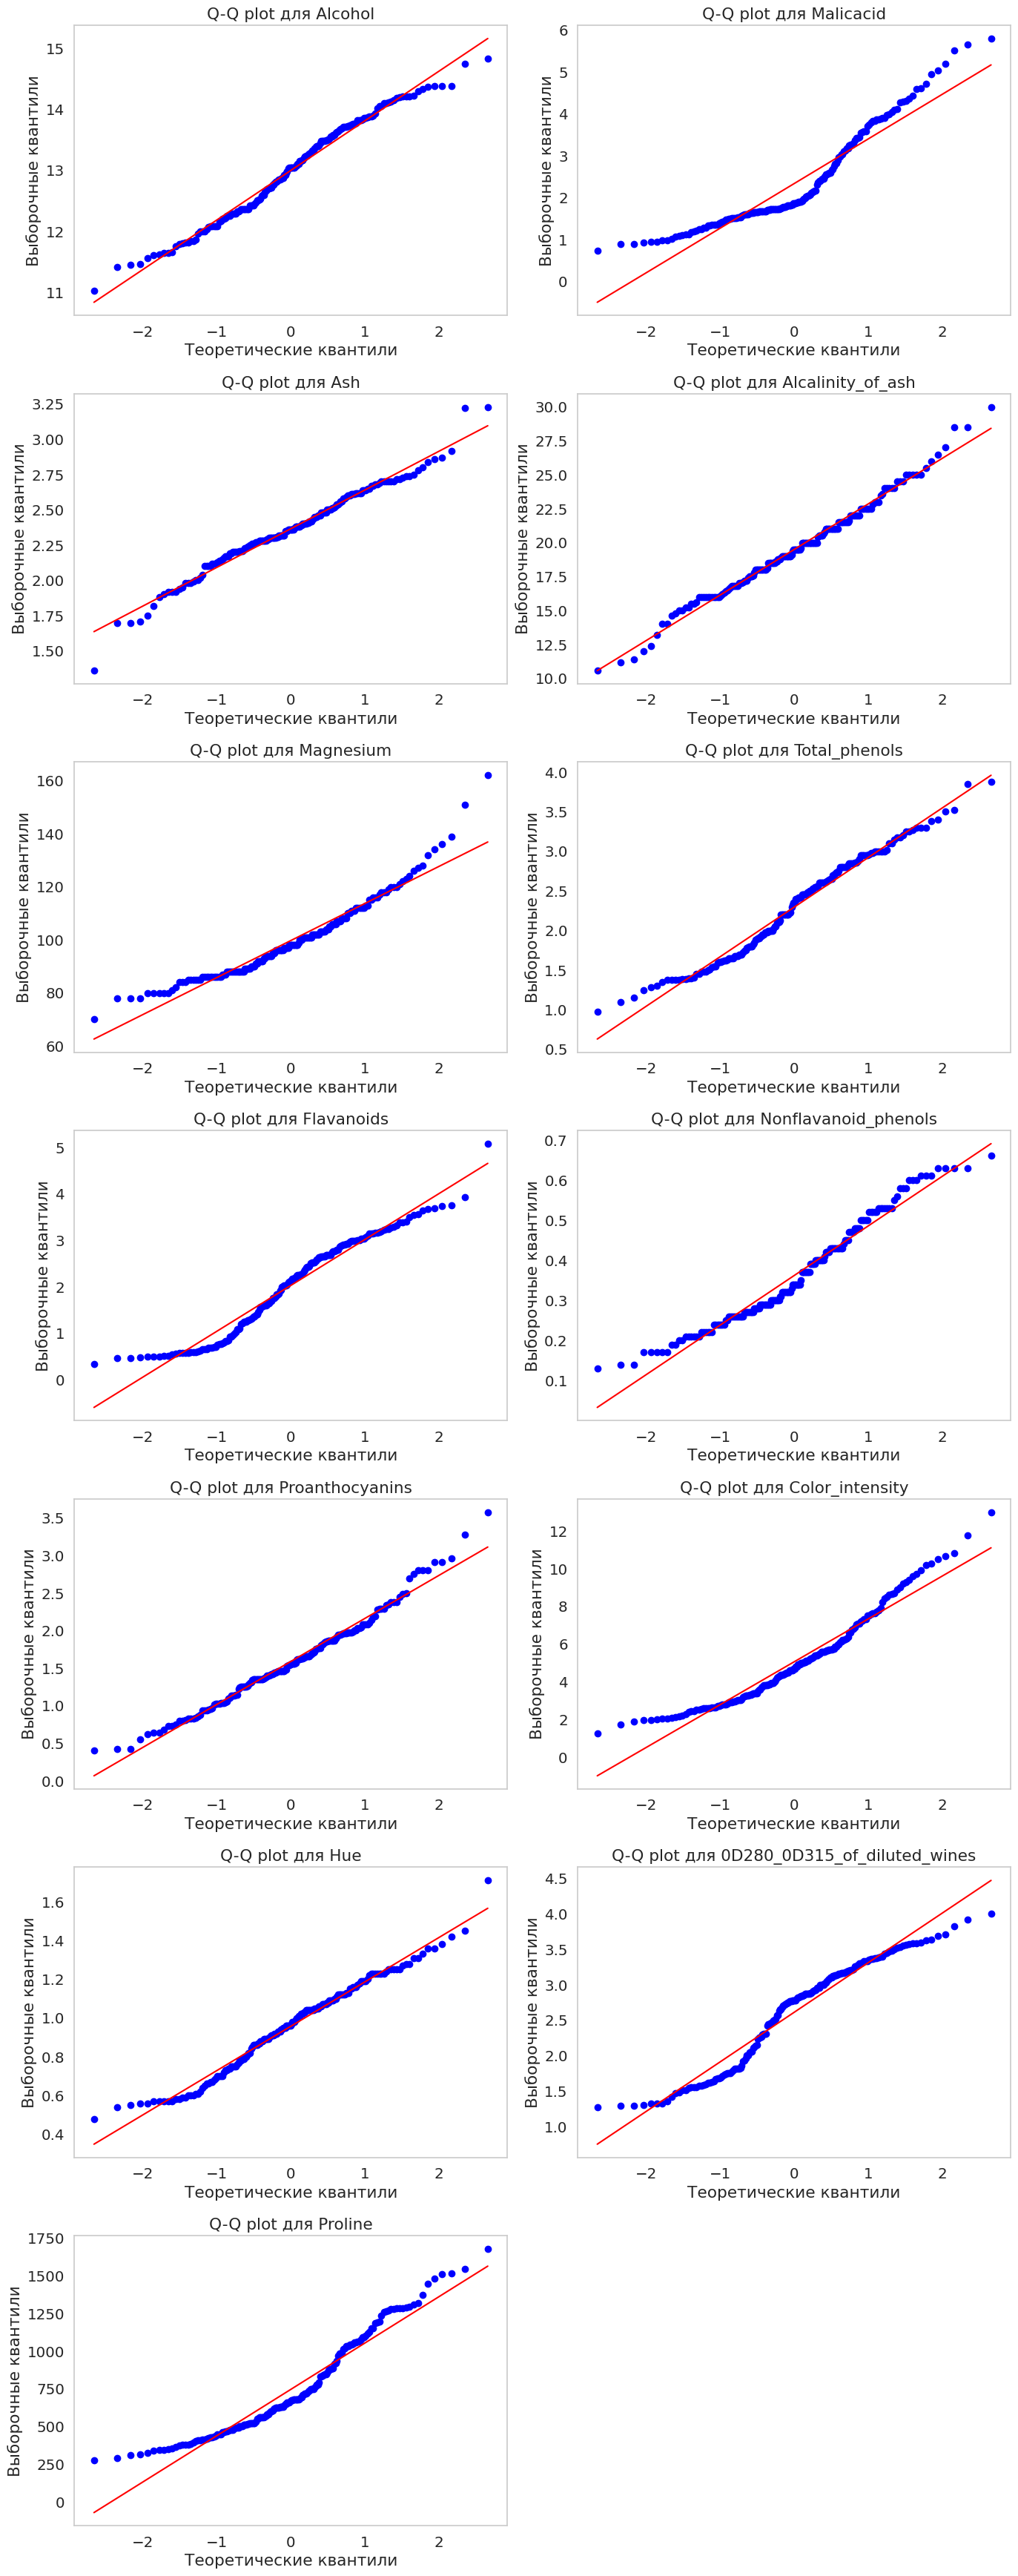

In [13]:
n_cols = 2
n_rows = (len(X.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
axes = axes.flatten()

for idx, column in enumerate(X.columns):
    ax = axes[idx]
    sps.probplot(X[column], dist="norm", plot=ax)
    ax.set_title(f"Q-Q plot для {column}")
    ax.set_xlabel("Теоретические квантили")
    ax.set_ylabel("Выборочные квантили")
    ax.grid()

for i in range(len(X.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [14]:
X.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')

Для каких признаков можно говорить об их нормальности и почему?

**Ответ:** Если распределение нормально, то точки должны лежать на прямой. Под этот критерий подходят столбцы: "Alcohol", "Ash", "Alcalinity_of_ash", "Total_phenols", "Proanthocyanins", "Hue".

Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. Помочь в этом может теоретический материал и выполненные ранее задачи.

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

<b><font color="#00b565" size="5">Обосновал выбор критериев</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b> Не обоснован выбор критериев. 




**Ответ:**     
Критерий Шапиро-Уилка:


* Он используется, на небольших выборках, вроде нашей. Является одним из наиболее мощных критериев для проверки нормальности.

* Применимость: подходит для небольших выборок, но не рекомендуется для очень больших выборок из-за чувствительности к малым отклонениям.

Критерий Жарка-Бера:

* Он является более мощным при больших выборках и обладает хорошей статистической мощностью при наличии отклонений от нормальности.

* Применимость: более подходит для более крупных выборок, но его точность может снижаться при очень малых выборках (например, меньше 20 наблюдений). А значит, этот критерий идеально нам подходит


Заключение: Так как в вашем случае данные представляют собой относительно небольшие выборки, то критерии Шапиро-Уилка и Жарка-Бера являются хорошими кандидатами для проверки гипотезы о нормальности распределения.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

**Ответ:**  Потому что мы хотим контролировать совместную ошибку первого рода

Какой метод для контроля FWER стоит применить и почему?

<b><font color="#00b565" size="5">Добавил ответ на вопрос</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b> Нет ответа на один вопрос или он неверен .  

**Ответ:** Мы точно можем применить метод Бонферрони или метод Холма. Метода Шидака не применим, так как статистики зависимы.

<b><font color="#00b565" size="5">Конец исправлений</font></b>

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

**Ответ:** Если скорректированный p-value гипотезы окажется меньше требуемого уровня значимости, то такую гипотезу необходимо отвергуть.

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции.

**Ответ:** Если данные не противоречат проверяемым свойствам распределения (семейства распределений), то можно считать, что выборка согласуется с основной гипотезой.

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу.

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [15]:
testing_columns = [
    "Alcohol",
    "Malicacid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "0D280_0D315_of_diluted_wines",
    "Proline",
]

pvalues_wine_shapiro = []
pvalues_wine_jarque_bera = []

X.shape

(178, 13)

In [16]:
for column in testing_columns:
    pvalues_wine_shapiro.append(sps.shapiro(X[column])[1])
    pvalues_wine_jarque_bera.append(sps.jarque_bera(X[column])[1])

In [17]:
tmp_df = pd.DataFrame(
    {
        "Столбец": testing_columns,
        "p-values: Шапиро-Уилка": np.round(pvalues_wine_shapiro, 3),
        "p-values: Жарка-Бера": np.round(pvalues_wine_jarque_bera, 3),
    }
)

In [18]:
tmp_df

,Столбец,p-values: Шапиро-Уилка,p-values: Жарка-Бера
0,Alcohol,0.020,0.061
1,Malicacid,0.000,0.000
2,Ash,0.039,0.008
3,Alcalinity_of_ash,0.264,0.251
4,Magnesium,0.000,0.000
5,Total_phenols,0.004,0.063
6,Flavanoids,0.000,0.053
7,Nonflavanoid_phenols,0.000,0.011
8,Proanthocyanins,0.014,0.008
9,Color_intensity,0.000,0.000


Займемся проверкой множественных гипотез

In [19]:
def apply_multiple_testing_correction_for_wine(pvals, names, method, shape, alpha=0.05):
    correction_results = multipletests(
        pvals,
        method=method,
        alpha=alpha,
    )

    pvals = correction_results[1].reshape(shape)
    outcome = correction_results[0].reshape(shape)

    results_df = pd.DataFrame(
        {
            "Название": names,
            f"p-value (скорр.), Шапиро: {method}": np.round(pvals[:, 0], 3),
            f"p-value (скорр.), Жарка: {method}": np.round(pvals[:, 1], 3),
            f"Отвергаем H0(Шапиро): {method}": outcome[:, 0],
            f"Отвергаем H0(Жарка): {method}": outcome[:, 1],
        }
    )

    return results_df


tmp_pvals = pvalues_wine_shapiro + pvalues_wine_jarque_bera
bonferroni_results = apply_multiple_testing_correction_for_wine(
    tmp_pvals, testing_columns, "bonferroni", [-1, 2]
)

holm_results = apply_multiple_testing_correction_for_wine(
    tmp_pvals, testing_columns, "holm", [-1, 2]
)

In [20]:
result_df = pd.concat(
    [
        tmp_df,
        bonferroni_results.iloc[:, [1, 2, 3, 4]],
        holm_results.iloc[:, [1, 2, 3, 4]],
    ],
    axis=1,
).set_index("Столбец")

<b><font color="#00b565" size="5">Проверил все признаки</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b> Проверены не все признаки.


In [21]:
result_df

,p-values: Шапиро-Уилка,p-values: Жарка-Бера,"p-value (скорр.), Шапиро: bonferroni","p-value (скорр.), Жарка: bonferroni",Отвергаем H0(Шапиро): bonferroni,Отвергаем H0(Жарка): bonferroni,"p-value (скорр.), Шапиро: holm","p-value (скорр.), Жарка: holm",Отвергаем H0(Шапиро): holm,Отвергаем H0(Жарка): holm
Столбец,,,,,,,,,,
Alcohol,0.020,0.061,0.521,0.000,False,True,0.160,0.000,False,True
Malicacid,0.000,0.000,1.000,1.000,False,False,0.271,0.753,False,False
Ash,0.039,0.008,0.000,0.114,True,False,0.000,0.062,True,False
Alcalinity_of_ash,0.264,0.251,0.000,0.003,True,True,0.000,0.002,True,True
Magnesium,0.000,0.000,0.376,0.000,False,True,0.145,0.000,False,True
Total_phenols,0.004,0.063,0.453,0.000,False,True,0.157,0.000,False,True
Flavanoids,0.000,0.053,0.000,1.000,True,False,0.000,0.316,True,False
Nonflavanoid_phenols,0.000,0.011,0.000,0.221,True,False,0.000,0.102,True,False
Proanthocyanins,0.014,0.008,1.000,0.000,False,True,0.753,0.000,False,True


<b><font color="#00b565" size="5">Конец исправлений</font></b>

Для каких признаков нормальность не отвергается?

**Ответ:** Как видим, ни для одного из признаков нормальность не отвергается.

<b><font color="#00b565" size="5">Дополнил вывод</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Неполный вывод.


**Вывод:** Использование МПГ подтвердило, что наши визуальные предположения о нормальности признаков не являются некорректными. Таким образом, можно считать, что данные согласуются с основной гипотезой. Визуальные наблюдения с помощью Q-Q plot также хорошо соотносятся с результатами МПГ. Небольшие отклонения на Q-Q plot позволяют почти сразу говорить о возможной нормальности некоторых признаков, что делает этот инструмент полезным для предварительных наблюдений. Эти быстрые визуальные проверки помогают формировать гипотезы, которые затем можно проверять с помощью статистических методов.

<b><font color="#00b565" size="5">Конец исправлений</font></b>

---
### Задача P4.

Исследуем влияние методов коррекции при множественной проверке гипотез на различные показатели качества.

**Теоретическая справка**

Приведем определения всех составляющих:
* $V_{\mathsf{P} S}(X)$ &mdash; количество верных гипотез, которые были отвергнуты для $\mathsf{P}$ критерием $S$ по выборке $X$,
* $R_S(X)$ &mdash; количество отвергнутых гипотез критерием $S$ по выборке $X$,
* $U_{\mathsf{P} S}(X)$ &mdash; количество *не*верных гипотез, которые были отвергнуты для $\mathsf{P}$ критерием $S$ по выборке $X$,
* $T_{\mathsf{P}}$ &mdash; количество *не*верных гипотез для $\mathsf{P}$.

Тогда характеристики определяются следующим образом.
* Вероятность хотя бы одного неверного отвержения
$$FWER = \mathsf{P}(V_{\mathsf{P} S}(X) > 0).$$

* Ожидаемая доля ложных отклонений среди всех отвергнутых гипотез
$$FDR = \mathsf{E}_\mathsf{P} \frac{V_{\mathsf{P} S}\;(X)}{\max(R_S(X), 1)}.$$

* Ожидаемая доля правильный отклонений среди всех неверных гипотез
$$Power = \mathsf{E}_\mathsf{P} \frac{U_{\mathsf{P} S}\;(X)}{\max(T_{\mathsf{P}}, 1)}.$$

**Постановка задачи**

Дана выборка $X = (X_1, ..., X_n)$ из многомерного нормального распределения с неизвестным вектором средних ${\theta}$ и известной матрицей ковариаций ${\Sigma}$.
Для каждой из компонент вектора проверяется гипотеза $\mathsf{H}_j\colon\ \theta_j = 0$ против правосторонней альтернативы. Соответственно, используется правосторонний критерий на основе выборочного среднего, который является при этом равномерно наиболее мощным.


*Задача*: исследовать, как ведут себя характеристики процедур МПГ в зависимости от
1. количества верных гипотез,
2. используемой процедуры МПГ,
3. степени скоррелированности компонент.

*Пояснения по каждому пункту.*

1. Для упрощения задачи будем рассматривать простую альтернативную гипотезу $\mathsf{H}'_j\colon\ \theta_j = \theta_{1j}$, где $\theta_{1j} > 0$ &mdash; фиксированное положительное число. На самом деле конкретный выбор $\theta_{1j}$ влияет только на масштаб. Тем самым мы концентрируемся на верности/неверности гипотезы, а не на конкретных распределениях их альтернативы.


2. Исследуемые методы корректировки:
    * отсутствие корректировки,
    * метод Бонферрони,
    * метод Холма,
    * метод Бенджамини-Иекутиелли.
    
*Можно также исследовать только часть методов и получить за это часть баллов.*


3. Для исследования степени скоррелированности будем рассматривать такие матрицы ковариаций ${\Sigma}$, у которых на диагонали стоит 1, а вне диагонали &mdash; число $\gamma \in [0, 1]$, отвечающее за корреляцию выборок. Напомним, при $\gamma=0$ выборки независимы, а при $\gamma=1$ выборки идентичны. Соответственно, в процессе исследования изучим поведение характеристик для независимых, зависимых, идентичных выборок.



**Исследование**

Для проведения исследования вам нужно реализовать примерно следующую процедуру.
* перебираем исследуемые варианты распределения данных, то есть числа $\gamma$
    * перебираем все комбинации верных/неверных гипотез
        * совершаем достаточно много итераций метода Монте-Карло
            * генерируем выборку
            * добавляем смещение в тех случаях, где основная гипотеза не верна
            * применяем критерий
            * для рассматриваемых методов МПГ:
                * применяем корректировку
                * сохраняем числа V, R, U, T
        * оцениваем FWER, FDR, Power
        

Поскольку с помощью Монте-Карло мы оцениваем разные величины, *для ускорения процедуры и получения менее шумных графиков* можно использовать одинаковые семплы для разных процедур. Тем самым схема получается следующая
* совершаем достаточно много итераций метода Монте-Карло
    * генерируем выборку с независимыми компонентами
    * перебираем исследуемые варианты распределения данных, то есть числа $\gamma$
        * меняем матрицу ковариаций (нужно домножить на корень из матрицы)
        * перебираем все комбинации верных/неверных гипотез
            * добавляем смещение в тех случаях, где основная гипотеза не верна
            * применяем критерий
            * для рассматриваемых методов МПГ:
                * применяем корректировку
                * сохраняем числа V, R, U, T
* оцениваем FWER, FDR, Power во всех случаях

*Вторая схема работает быстрее, но немного сложнее в реализации. <u>Вы можете реализовать любую схему.</u>*


**Рекомендации и замечания:**
* для ускорения вычислений реализуйте критерий, принимающий выборку векторов, и использующий усреднение по указанной оси;
* реализацию метода Бонферонни можно взять из `statsmodels`, она работает достаточно быстро;
* реализацию методов Холма и Бенджамини-Иекутиелли тоже можно взять из `statsmodels`, но они работают существенно дольше;
* эти методы можно реализовать самостоятельно без циклов, причем возвращать достаточно *только вектор результатов* (1 &mdash; гипотеза отвергается, 0 &mdash; не отвергается), скорректированные p-value для исследования вычислять не требуется;
* при реализации методов помогут функции `np.argsort` для пересортировки гипотез и `np.cumprod` для бинарного массива с целью выполнения нисходящей/восходящей процедуры.

Возьмем следующие параметра эксперимента

Для каждой характеристики постройте графики, используя сетку, например $2 \times 4$. На каждом графике для определенной комбинации верности гипотез постройте график это характеристики в зависимости от значения корреляции $\gamma$ для всех методов корректировки МПГ. Для FWER и FDR отметьте также уровень $\alpha=0.05$

In [22]:
import itertools

sample_size = 100  # размер выборки на каждой итерации
n_iters = 100  # число экспериментов для каждой конфигурации
alpha = 0.05  # уровень значимости

theta_1 = 0.25  # значение из альтернативной гипотезы
n_hypothesis = 3  # количество гипотез

# Список всех комбинаций верных и неверных гипотез
hypothesis_mask_list = np.array(list(itertools.product([0, 1], repeat=n_hypothesis)))
print(hypothesis_mask_list)

# Перебираемые значения корреляции
n_correlations = 11
correlations_list = np.linspace(0, 1, n_correlations)
print(correlations_list)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [23]:
def generate_matrix(size, a):
    matrix = np.full((size, size), a)
    np.fill_diagonal(matrix, 1)
    return matrix


def MK_method():
    pass

0it [00:00, ?it/s]

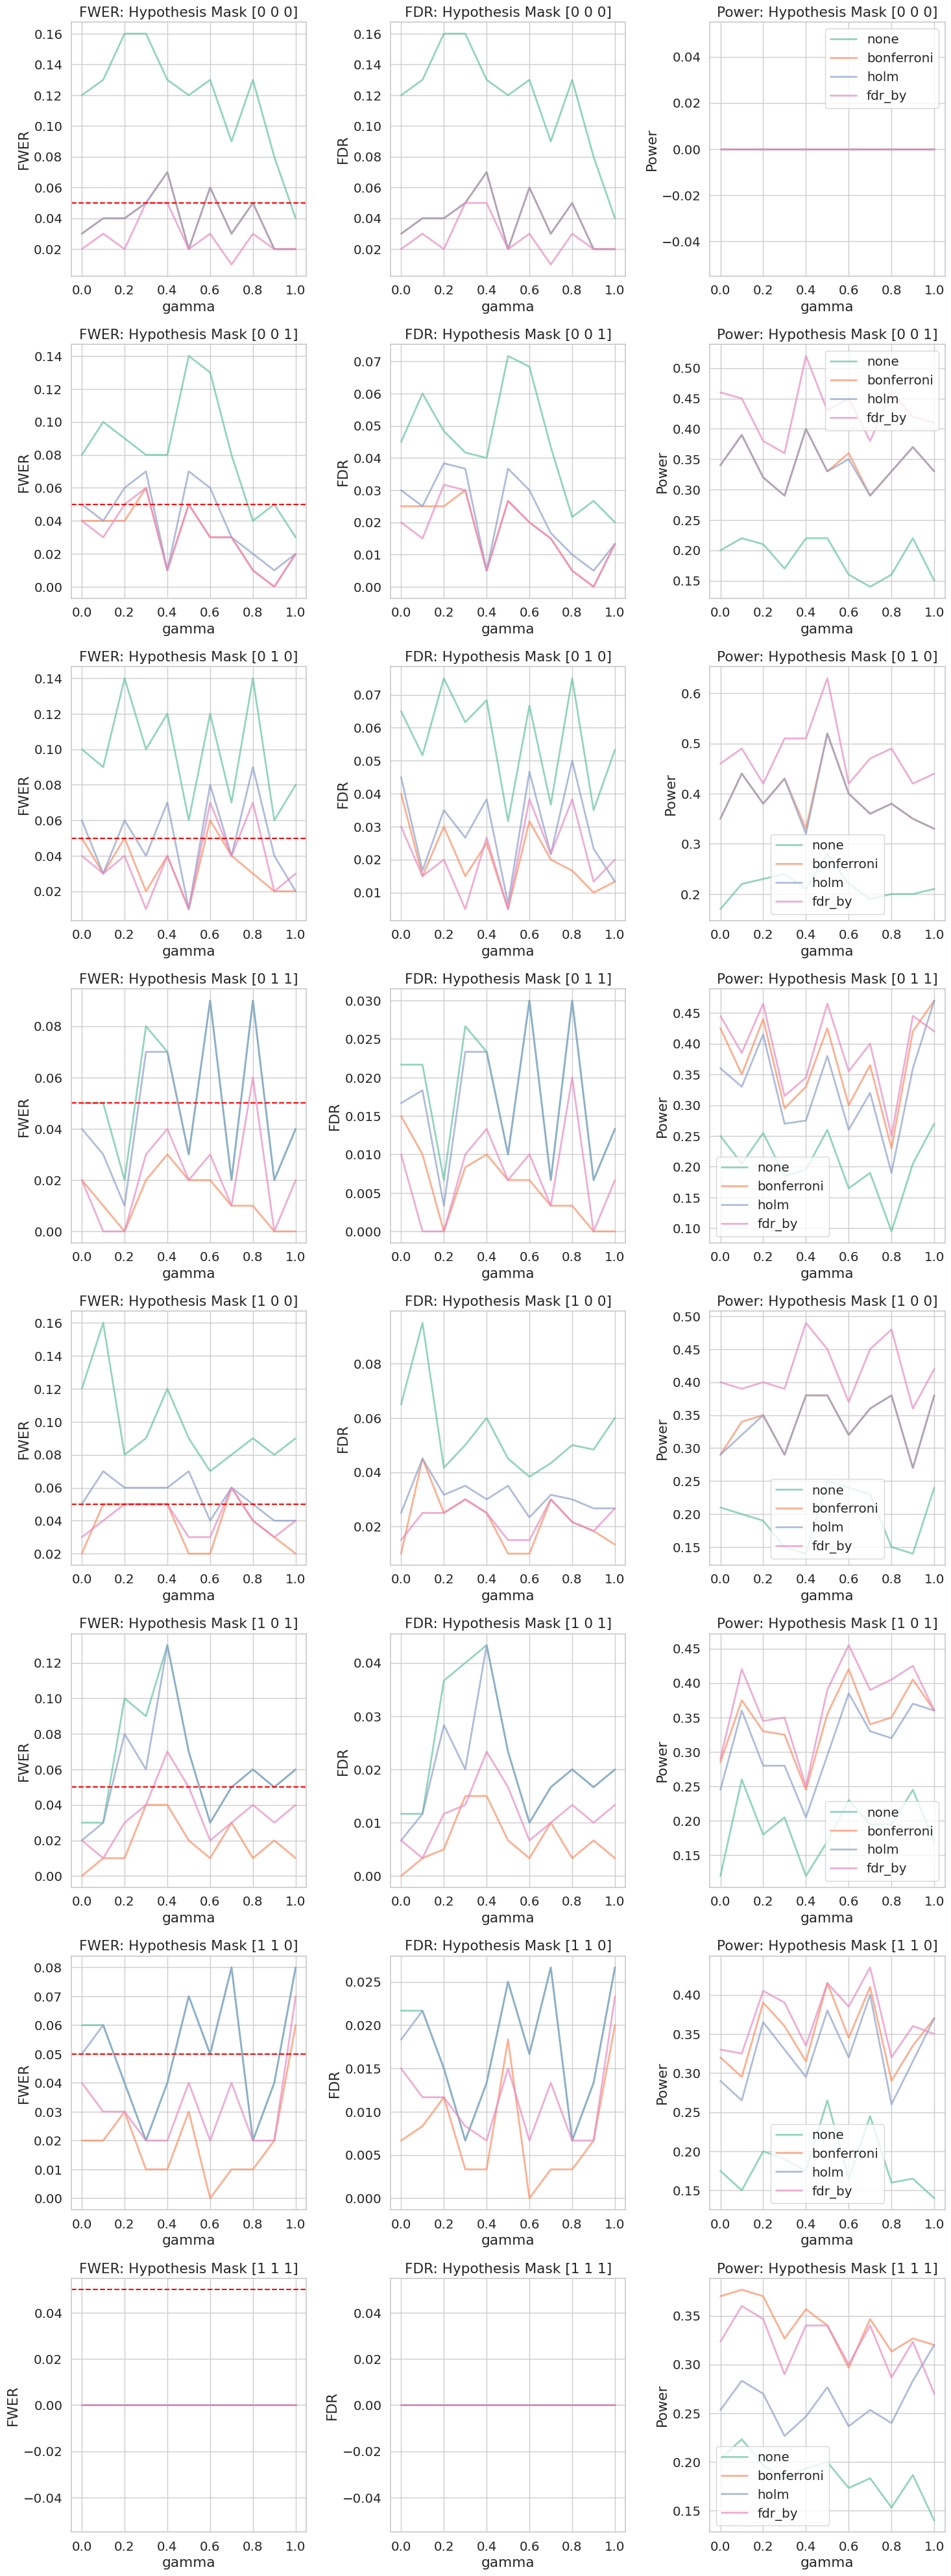

In [24]:
plt.figure(figsize=(15, 40))  

methods = ["none", "bonferroni", "holm", "fdr_by"]
metrics = ["FWER", "FDR", "Power"]

# Предполагается, что hypothesis_mask_list и correlations_list определены заранее
for mask_index, hypothesis_mask in tqdm(enumerate(hypothesis_mask_list)):
    # Инициализация метрик для каждой гипотезы
    FWER = {method: [] for method in methods}
    FDR = {method: [] for method in methods}
    Power = {method: [] for method in methods}

    for gamma in correlations_list:
        sigma_matrix = generate_matrix(n_hypothesis, gamma)
        multinormal_dist = sps.multivariate_normal(
            mean=hypothesis_mask * theta_1, cov=sigma_matrix, allow_singular=True
        )
        normal_dist = sps.norm(0, np.sqrt(sample_size))

        # Инициализация метрик для текущего значения gamma
        V = {method: [] for method in methods}
        R = {method: [] for method in methods}
        U = {method: [] for method in methods}
        T = {method: [] for method in methods}

        for _ in range(n_iters):
            X = multinormal_dist.rvs(size=sample_size)
            pvals = 1 - normal_dist.cdf(np.sum(X, axis=0))

            for correction_name in methods:
                if correction_name != "none":
                    outcomes = multipletests(
                        pvals, method=correction_name, alpha=alpha
                    )[0]
                else:
                    outcomes = pvals < alpha

                V[correction_name].append(
                    np.sum((outcomes == True) & (hypothesis_mask == 0))
                )
                R[correction_name].append(np.sum(outcomes))
                U[correction_name].append(
                    np.sum((outcomes == False) & (hypothesis_mask == 1))
                )
                T[correction_name].append(np.sum(hypothesis_mask))

        for correction_name in methods:
            FWER[correction_name].append(np.mean(np.array(V[correction_name]) > 0))
            FDR[correction_name].append(
                np.mean(
                    np.array(V[correction_name])
                    / np.maximum(np.array(R[correction_name]), 1)
                )
            )
            Power[correction_name].append(
                np.mean(
                    np.array(U[correction_name])
                    / np.maximum(np.array(T[correction_name]), 1)
                )
            )

    # Построение графиков для каждой метрики
    for metric_index, metric in enumerate(metrics):
        plt.subplot(
            len(hypothesis_mask_list),
            len(metrics),
            mask_index * len(metrics) + metric_index + 1,
        )
        for correction_name in methods:
            plt.plot(
                correlations_list,
                globals()[metric][
                    correction_name
                ],  # Используем globals(), чтобы обратиться к переменным
                lw=2,
                label=correction_name,
                alpha=0.7,  # Сделал линии менее прозрачными
            )

        if metric == "FWER":
            plt.axhline(y=alpha, color='red', linestyle='--', label=f'alpha = {alpha}')
        
        plt.title(
            f"{metric}: Hypothesis Mask {hypothesis_mask}"
        )  # Используем 1-индексацию для читабельности
        plt.xlabel("gamma")
        plt.ylabel(metric)
        if metric_index == len(metrics) - 1:
            plt.legend()

plt.tight_layout()
plt.show()

Проинтерпретируйте полученные результаты и сделайте выводы.

Проведите эксперименты для другого количества гипотез. При этом для ускорения можно перебирать не все комбинации гипотез, а только те, для которых результат будет отличаться. Какие именно &mdash; подумайте, проанализировав полученные выше графики.

<b><font color="#00b565" size="5">Добавил выводы про разные типы матриц</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b>Нет выводов про разные типы матриц. 

Поведение характеристик процедур МПГ при равном количестве справедливых гипотез не зависит от их номера, так как исследуемые величины зависят не от номера гипотезы, а от её предполагаемой справедливости и других факторов.

<b><font color="#00b565" size="5">Конец исправлений</font></b>

Проведем аналогичный эксперимент с 2 парамаи гипотез.

In [25]:
import itertools

sample_size = 100  # размер выборки на каждой итерации
n_iters = 100  # число экспериментов для каждой конфигурации
alpha = 0.05  # уровень значимости

theta_1 = 0.25  # значение из альтернативной гипотезы
n_hypothesis = 2  # количество гипотез

# Список всех комбинаций верных и неверных гипотез
hypothesis_mask_list = np.array(list(itertools.product([0, 1], repeat=n_hypothesis)))
print(hypothesis_mask_list)

# Перебираемые значения корреляции
n_correlations = 11
correlations_list = np.linspace(0, 1, n_correlations)
print(correlations_list)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


0it [00:00, ?it/s]

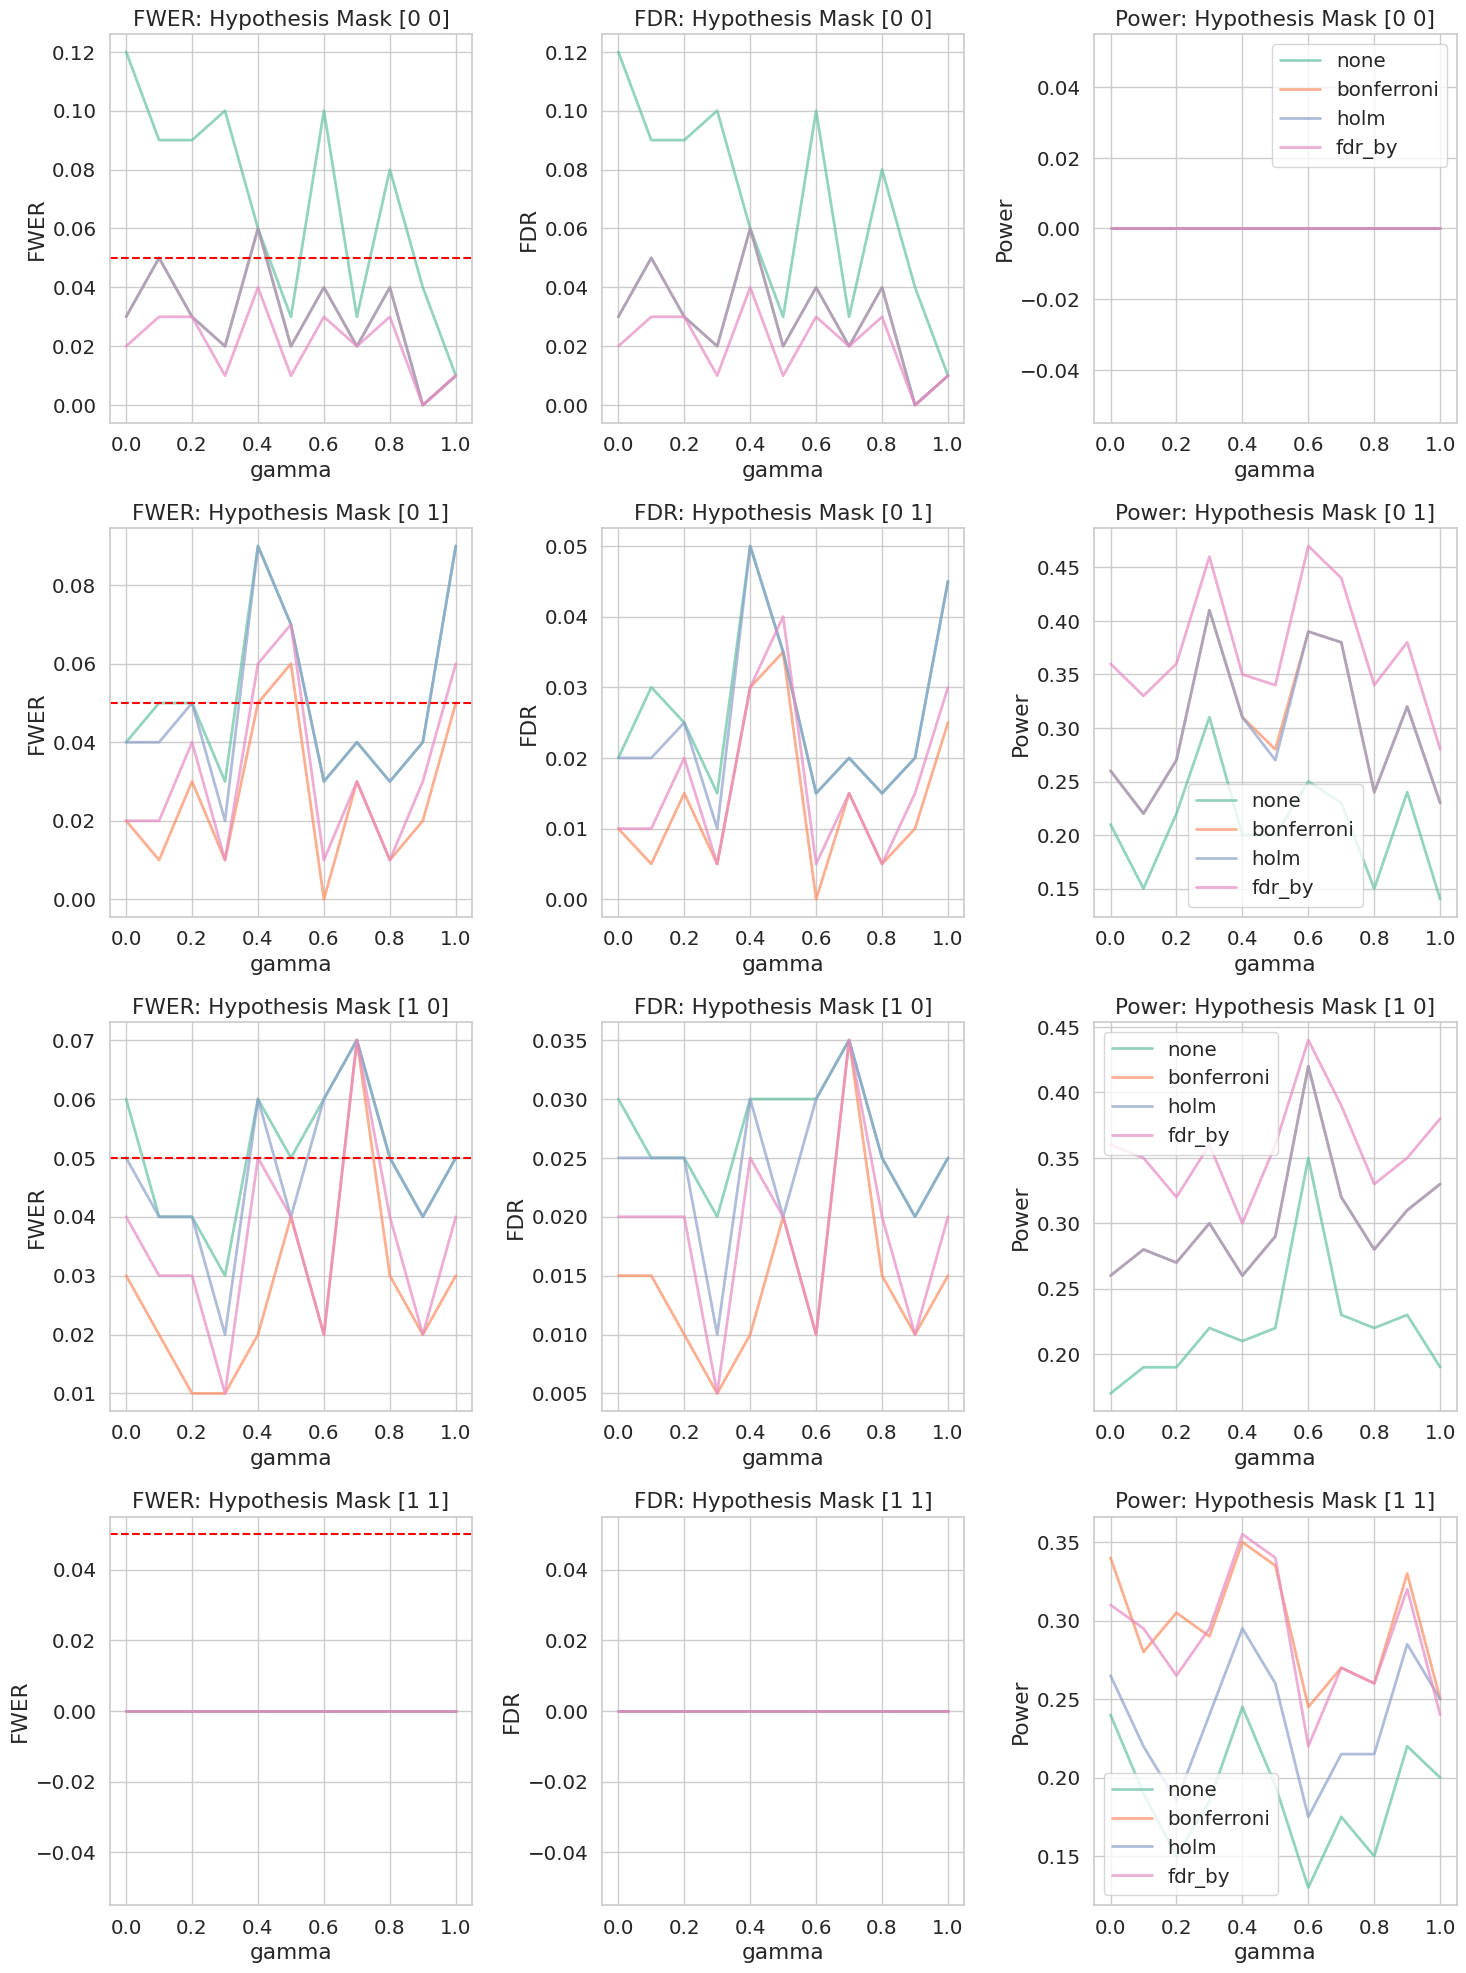

In [26]:
plt.figure(figsize=(15, 20))

methods = ["none", "bonferroni", "holm", "fdr_by"]
metrics = ["FWER", "FDR", "Power"]

# Предполагается, что hypothesis_mask_list и correlations_list определены заранее
for mask_index, hypothesis_mask in tqdm(enumerate(hypothesis_mask_list)):
    # Инициализация метрик для каждой гипотезы
    FWER = {method: [] for method in methods}
    FDR = {method: [] for method in methods}
    Power = {method: [] for method in methods}

    for gamma in correlations_list:
        sigma_matrix = generate_matrix(n_hypothesis, gamma)
        multinormal_dist = sps.multivariate_normal(
            mean=hypothesis_mask * theta_1, cov=sigma_matrix, allow_singular=True
        )
        normal_dist = sps.norm(0, np.sqrt(sample_size))

        # Инициализация метрик для текущего значения gamma
        V = {method: [] for method in methods}
        R = {method: [] for method in methods}
        U = {method: [] for method in methods}
        T = {method: [] for method in methods}

        for _ in range(n_iters):
            X = multinormal_dist.rvs(size=sample_size)
            pvals = 1 - normal_dist.cdf(np.sum(X, axis=0))

            for correction_name in methods:
                if correction_name != "none":
                    outcomes = multipletests(
                        pvals, method=correction_name, alpha=alpha
                    )[0]
                else:
                    outcomes = pvals < alpha

                V[correction_name].append(
                    np.sum((outcomes == True) & (hypothesis_mask == 0))
                )
                R[correction_name].append(np.sum(outcomes))
                U[correction_name].append(
                    np.sum((outcomes == False) & (hypothesis_mask == 1))
                )
                T[correction_name].append(np.sum(hypothesis_mask))

        for correction_name in methods:
            FWER[correction_name].append(np.mean(np.array(V[correction_name]) > 0))
            FDR[correction_name].append(
                np.mean(
                    np.array(V[correction_name])
                    / np.maximum(np.array(R[correction_name]), 1)
                )
            )
            Power[correction_name].append(
                np.mean(
                    np.array(U[correction_name])
                    / np.maximum(np.array(T[correction_name]), 1)
                )
            )

    # Построение графиков для каждой метрики
    for metric_index, metric in enumerate(metrics):
        plt.subplot(
            len(hypothesis_mask_list),
            len(metrics),
            mask_index * len(metrics) + metric_index + 1,
        )
        for correction_name in methods:
            plt.plot(
                correlations_list,
                globals()[metric][
                    correction_name
                ],  # Используем globals(), чтобы обратиться к переменным
                lw=2,
                label=correction_name,
                alpha=0.7,  # Сделал линии менее прозрачными
            )
        if metric == "FWER":
            plt.axhline(y=alpha, color="red", linestyle="--", label=f"alpha = {alpha}")
            
        plt.title(
            f"{metric}: Hypothesis Mask {hypothesis_mask}"
        )  # Используем 1-индексацию для читабельности
        plt.xlabel("gamma")
        plt.ylabel(metric)
        if metric_index == len(metrics) - 1:
            plt.legend()

plt.tight_layout()
plt.show()

**Выводы:**

Мы смогли пронаблюдать зависимость FWER в зависимости от разных $\gamma$, причем FWER при применении методов корректировок оказывался ниже, чем без примененния. Также эти методы помогают поддерживать уровень доверия $\alpha$.

Аналогично с мощностью. Мощность при использовании методов корректировки оказывается выше, чем без. Заметим, что пародоксально, но метод Бонферрони зачастую оказывался чуть мощнее, чем метод Холма. Чаще всего, самым мощным методом оказывался метод Бенджамина-Иекутелли.